# Plot street neworks and routes as interactive leaflet web maps

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download a street network, calculate a route between two points, and create a Leaflet web map with folium.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

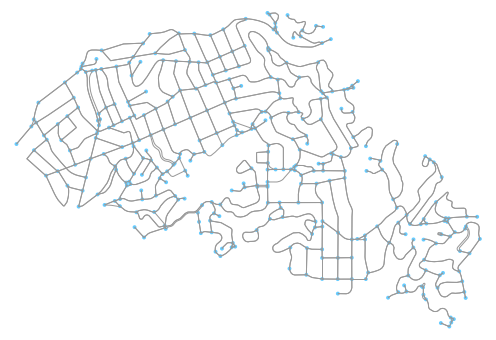

In [3]:
# download the street network for Piedmont, CA
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

## Plot a city's street network as an interactive web map

In [4]:
# plot the street network with folium
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)

In [6]:
# save as html file then display map as an iframe
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

You can zoom into the street network above or click any edge to get more info.

## Plot a route as an interactive web map

In [7]:
# use networkx to calculate the shortest path between two nodes
origin_node = list(G.nodes())[0]
destination_node = list(G.nodes())[-1]
route = nx.shortest_path(G, origin_node, destination_node)

In [8]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

In [9]:
# save as html file then display map as an iframe
filepath = 'data/route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

## Or plot a route on top of the complete street network map

In [10]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G, route, route_map=graph_map, popup_attribute='length')

In [11]:
# save as html file then display map as an iframe
filepath = 'data/route_graph.html'
route_graph_map.save(filepath)
IFrame(filepath, width=600, height=500)